In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [2]:
from sklearn import datasets

# Loading the data from scikit-learn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [6]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [7]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


11.1 ms ± 629 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [19]:
def plot_pred(y_pred):
 pca = PCA(n_components=2).fit_transform(X_std)
 plt.figure(figsize=(8,3))
 colours = 'rbg'
 for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

 plt.xticks([])
 plt.yticks([])
 plt.axis('off')
 plt.show()

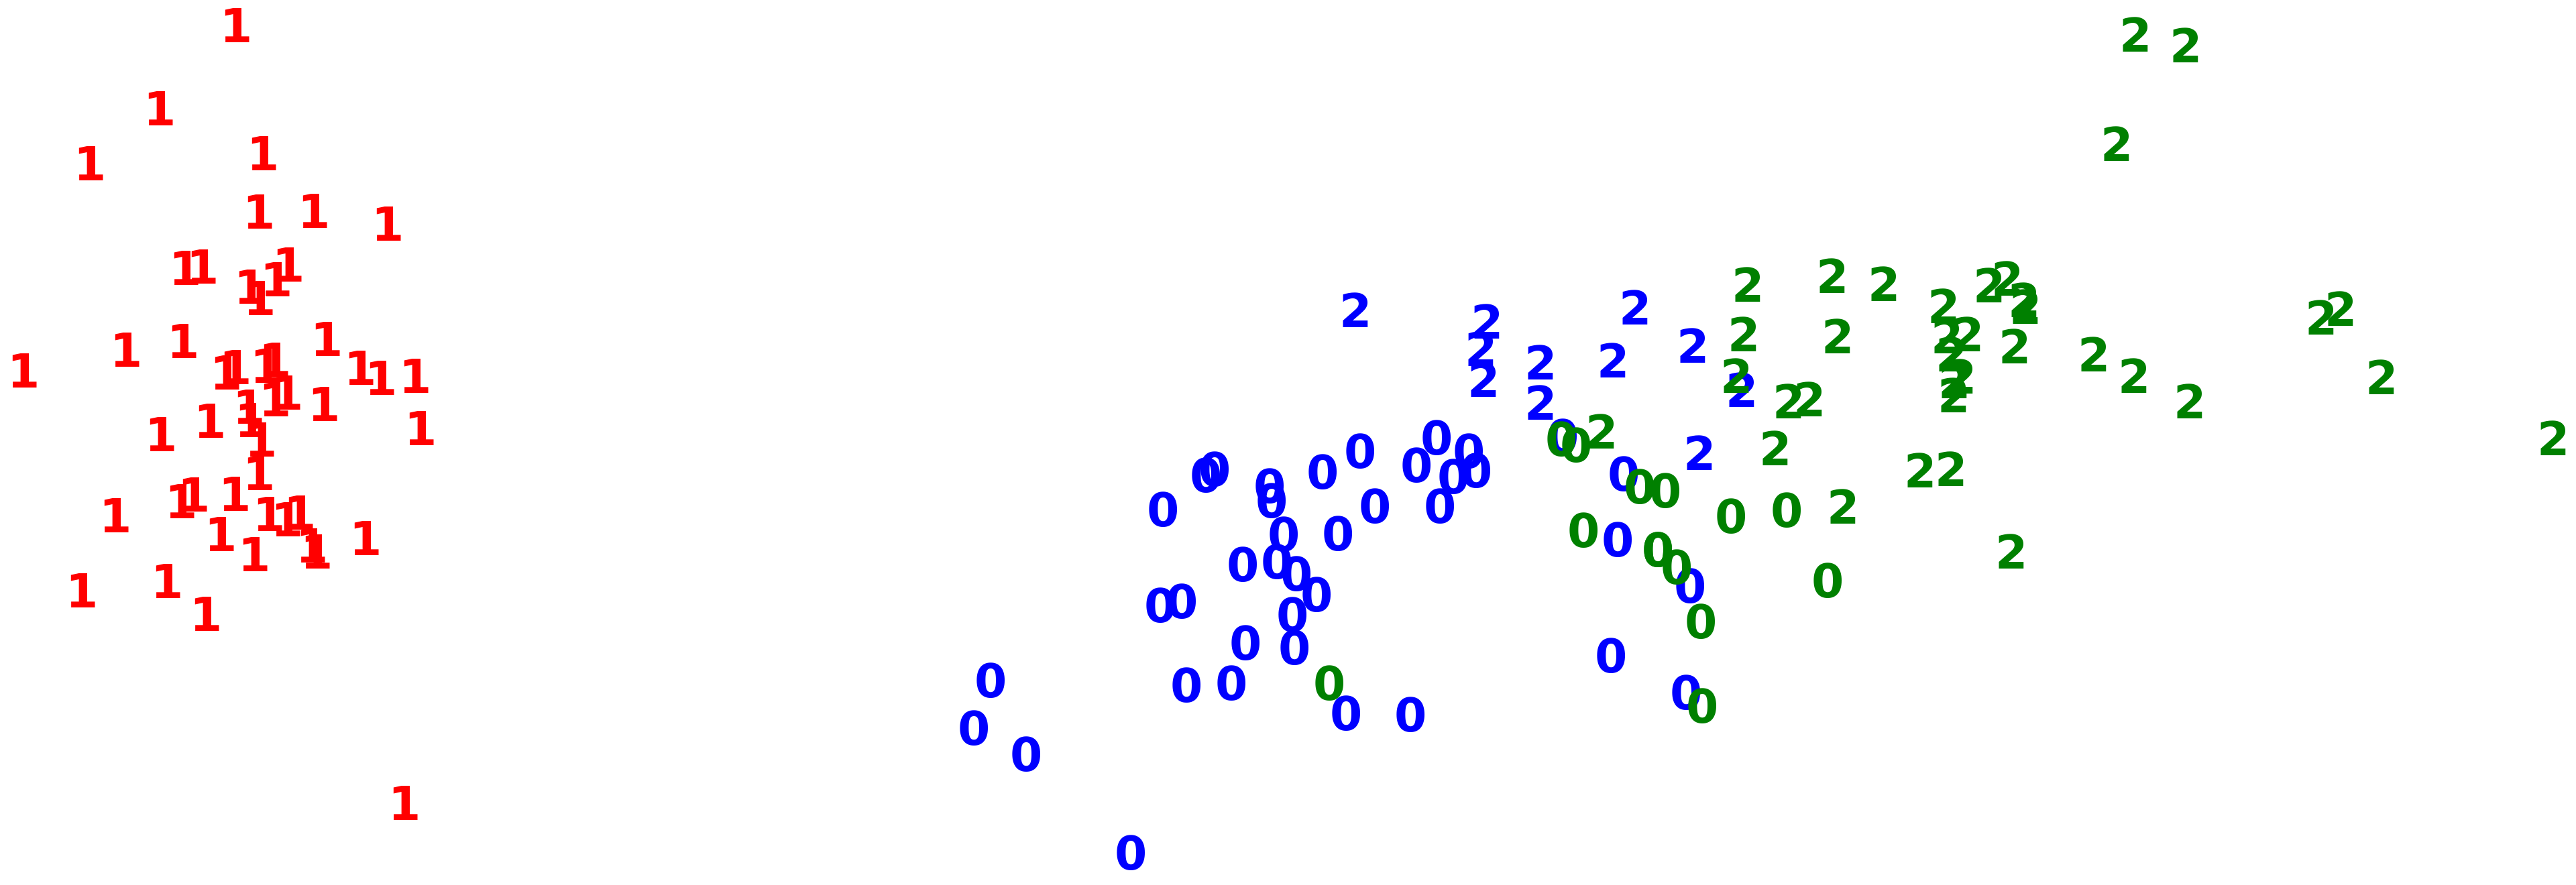

In [20]:
plot_pred(y_pred)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


running with 2 groups


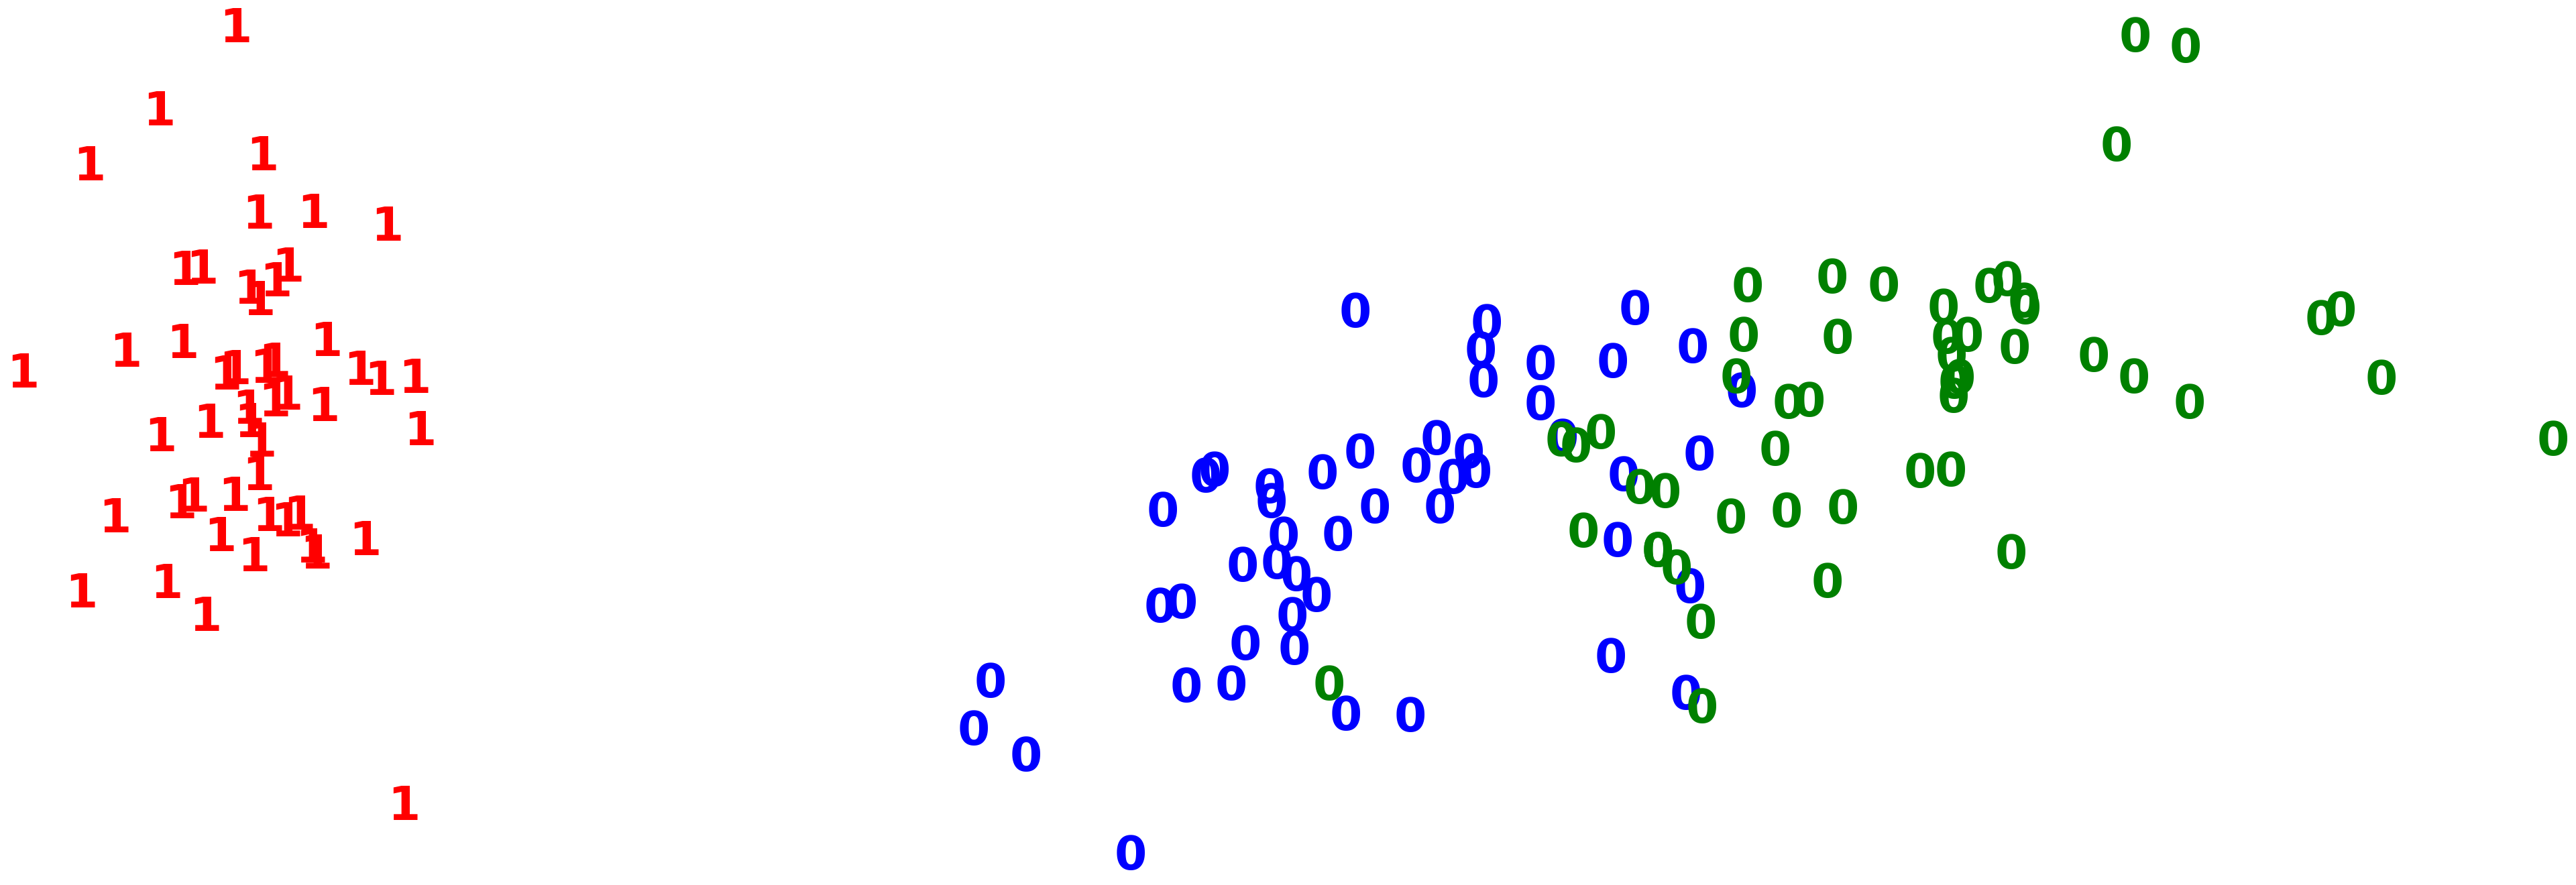

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


running with 3 groups


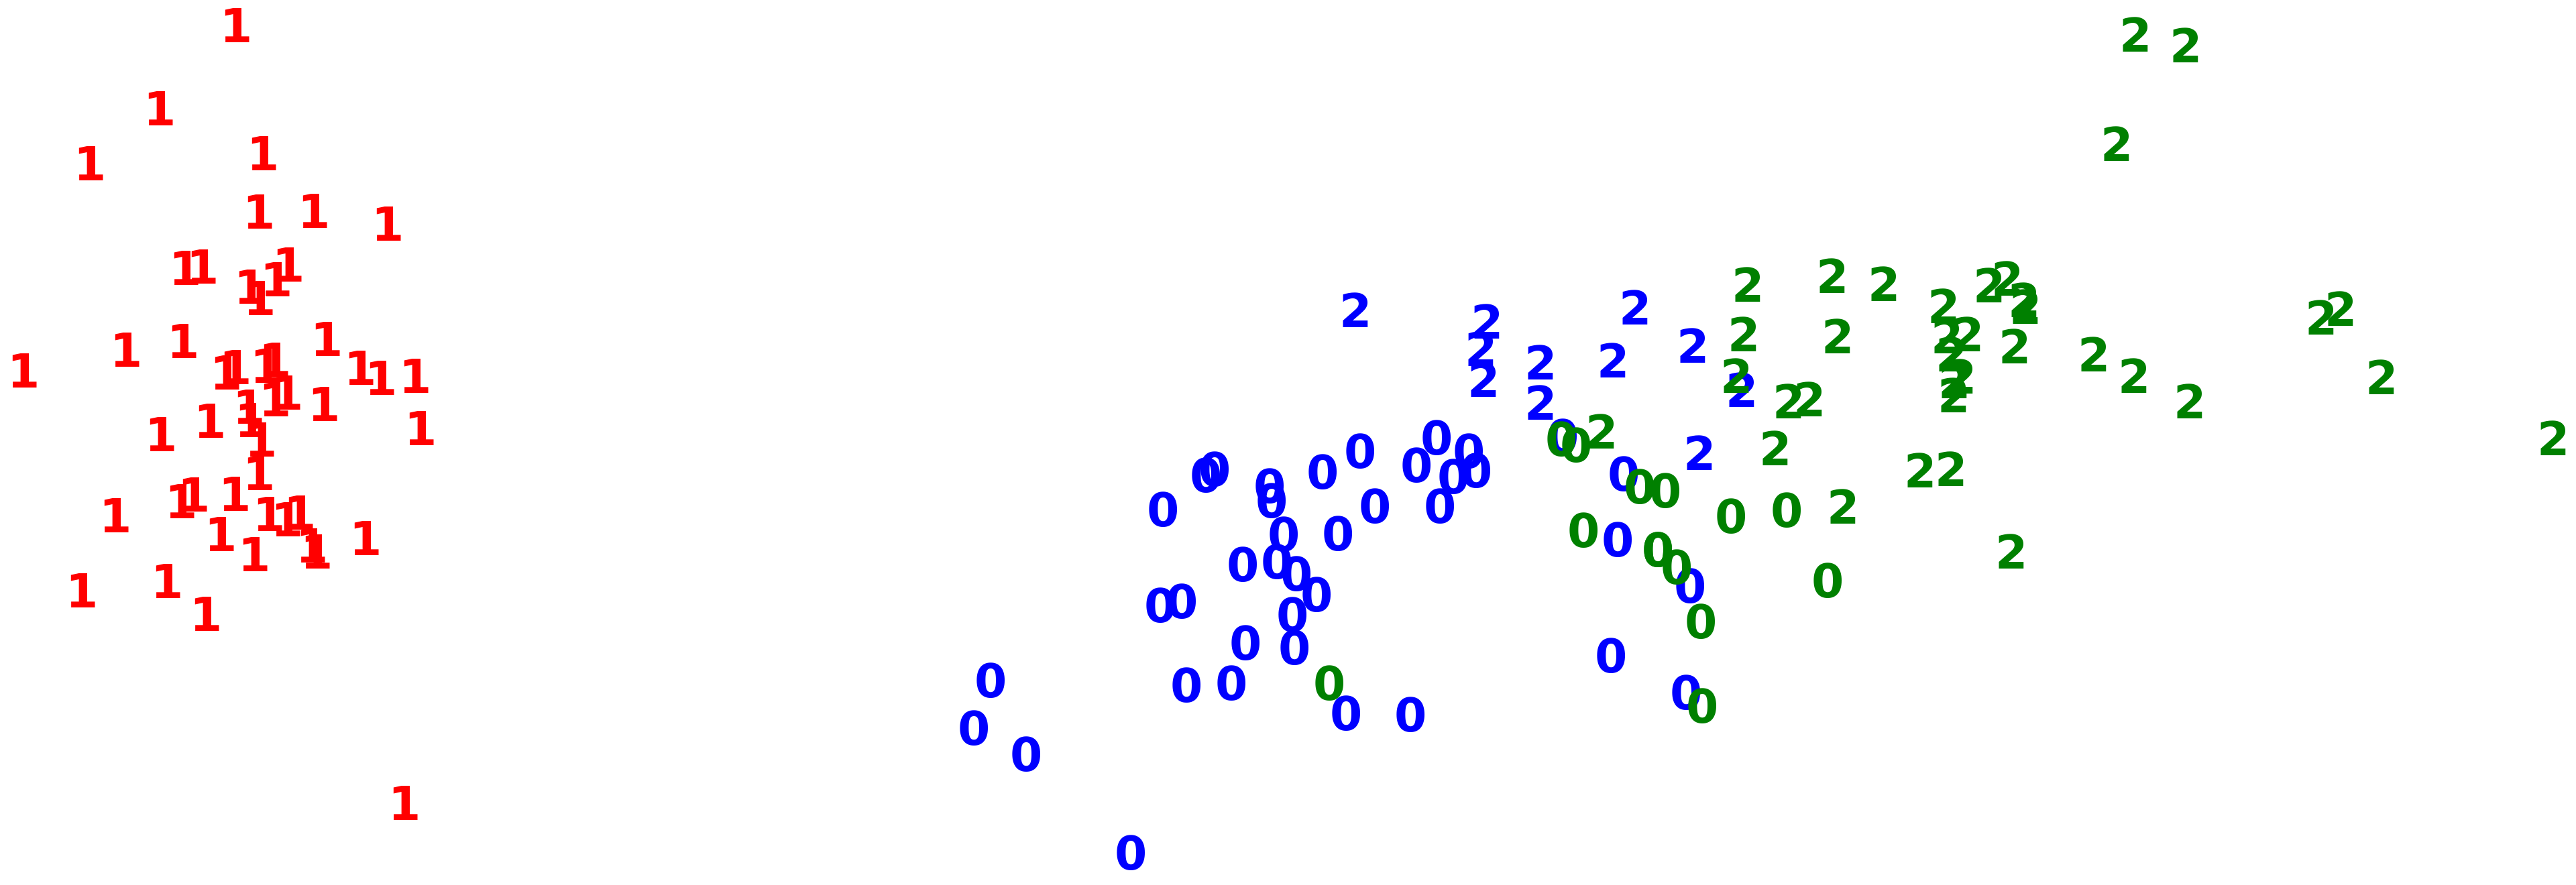

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


running with 4 groups


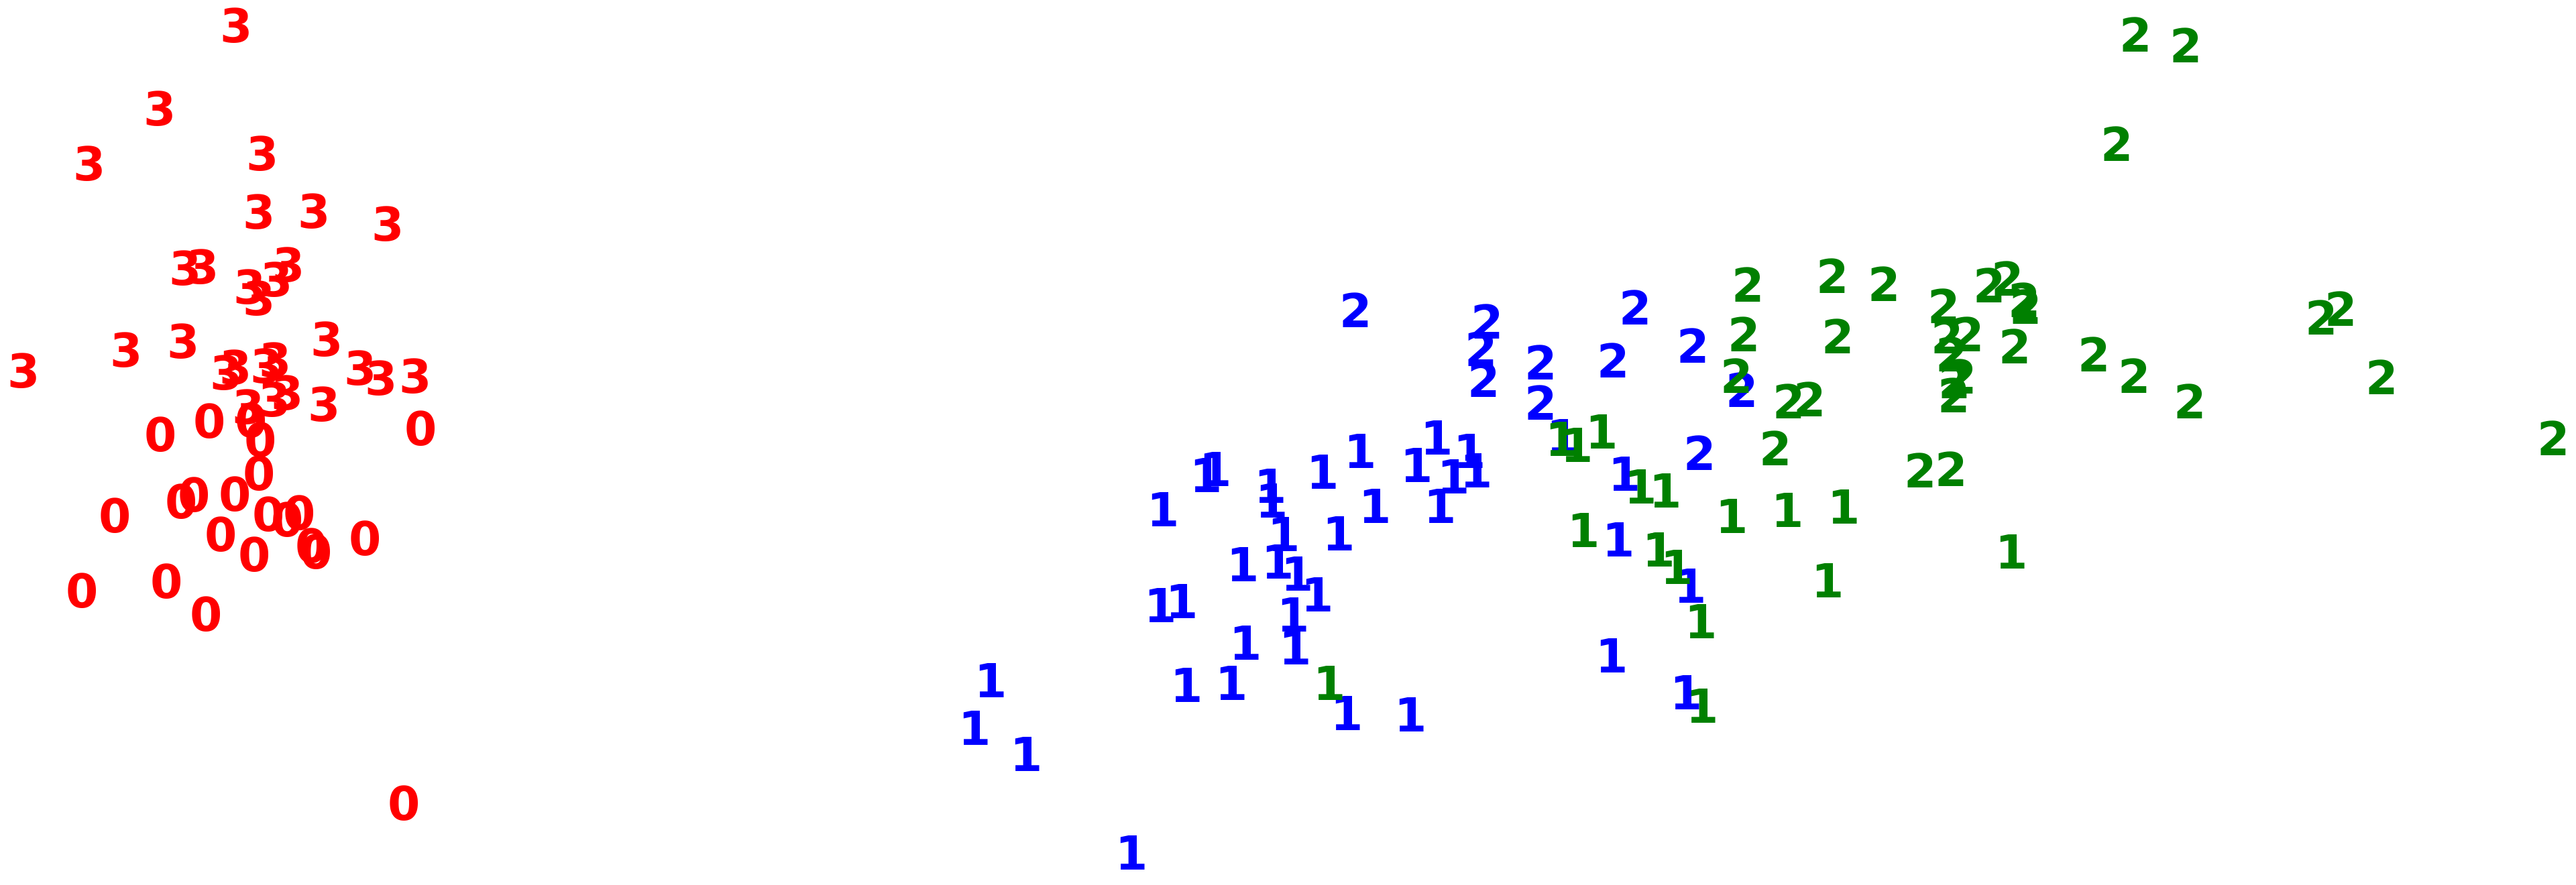

In [23]:

# run with 2 to 5 clusters
# Defining the k-means
for n_clusters in range(2,5,1):
 kmeans_cluster = KMeans(n_clusters=n_clusters, random_state=123)

 # Fit model
 kmeans_cluster.fit(X_std)
 y_pred = kmeans_cluster.predict(X_std)
 print(f'running with {n_clusters} groups')
 plot_pred(y_pred)

### with 2 to 5 groups , the very first type is properly grouped but the next 2 groups have some overlap

In [28]:
import pandas as pd
from sqlalchemy import create_engine
import warnings
engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('SELECT * FROM heartdisease',con=engine2)
engine2.dispose()

In [38]:
heartdisease_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [44]:
heartdisease_df['13'].unique()

array([0, 2, 1, 3, 4])

In [39]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 1, 0)

In [40]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# this need to cluster in to 2 groups 
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
kmeans_cluster.fit(X_std)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=123)

In [41]:
y_pred = kmeans_cluster.predict(X_std)


In [42]:
def plot_pred(y_pred):
 pca = PCA(n_components=2).fit_transform(X_std)
 plt.figure(figsize=(8,3))
 colours = 'rbg'
 for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

 plt.xticks([])
 plt.yticks([])
 plt.axis('off')
 plt.show()

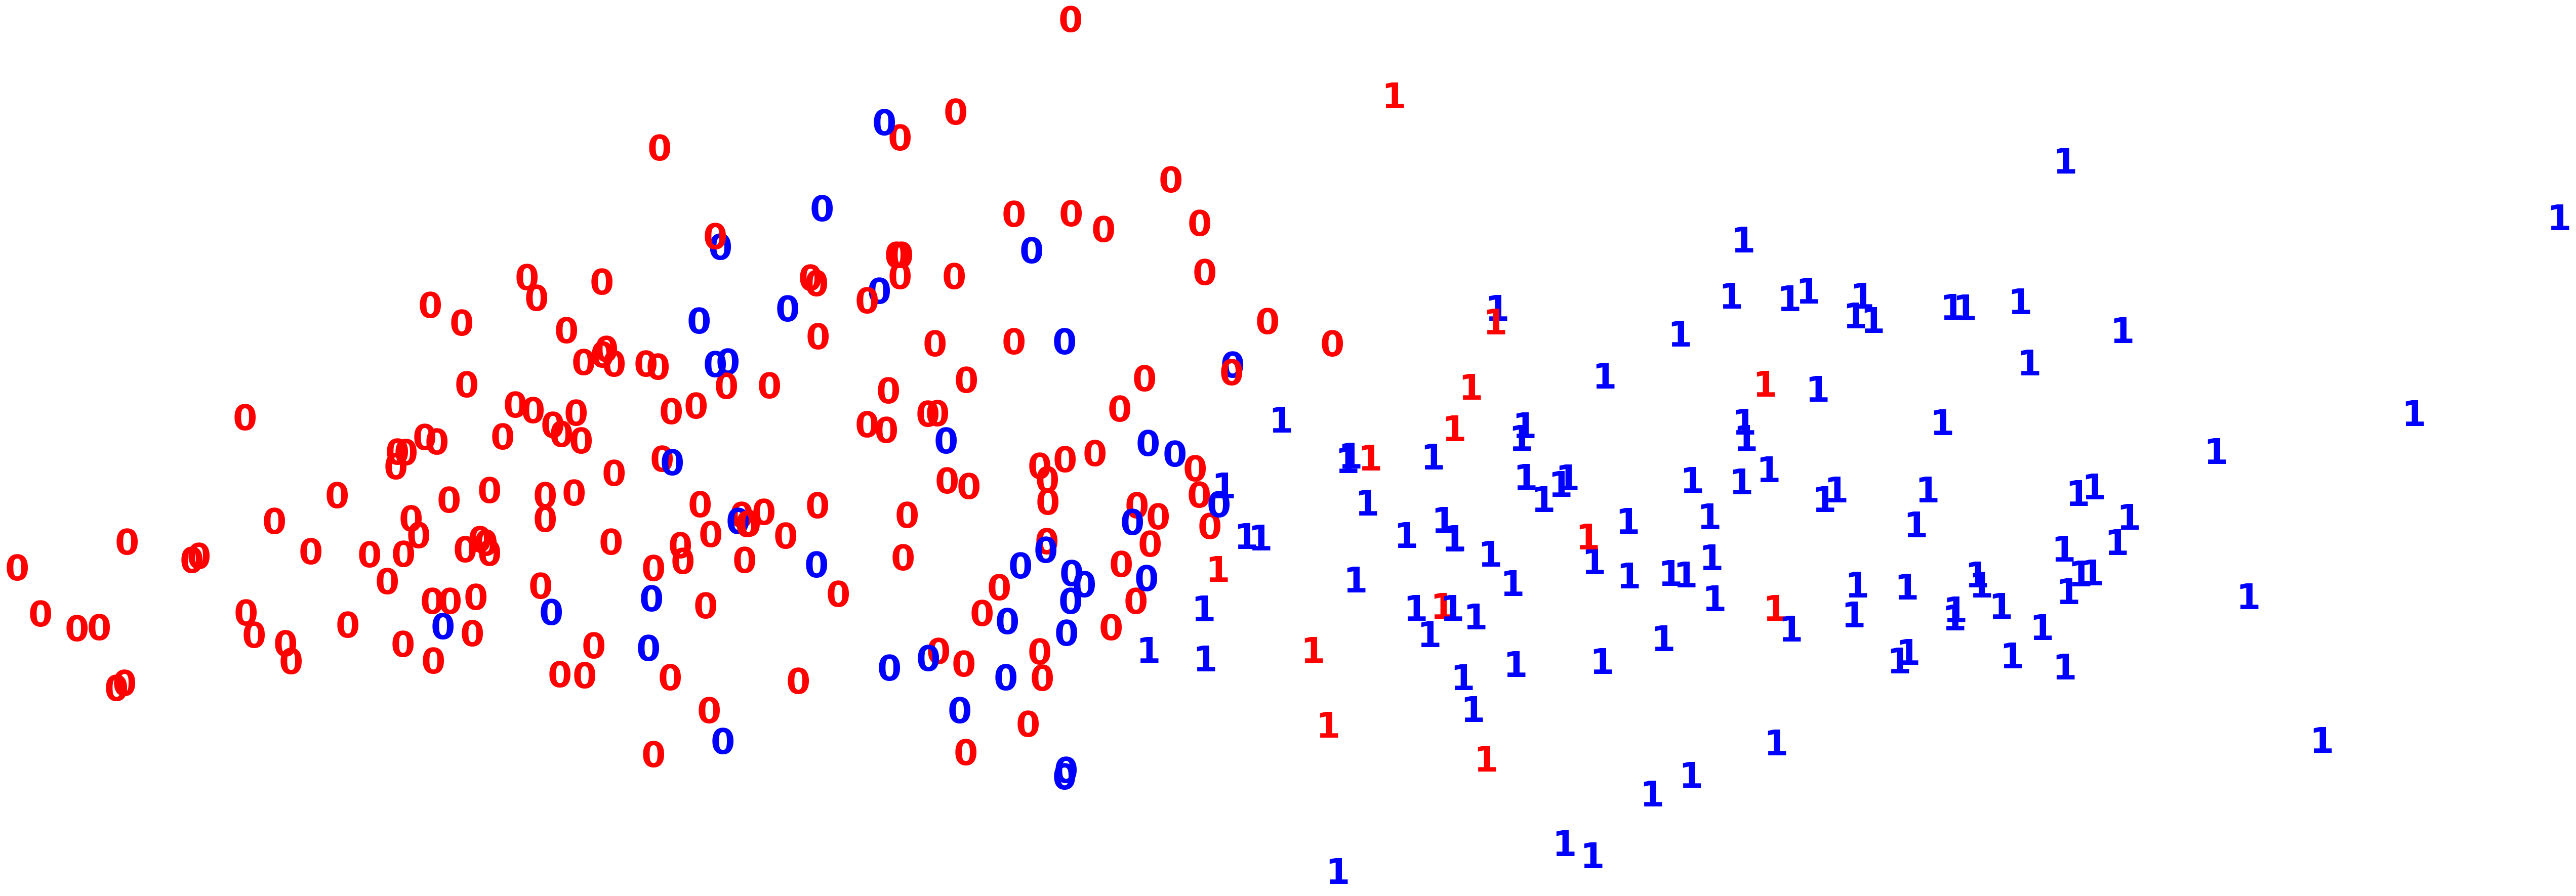

In [37]:
plot_pred(y_pred)